In [1]:
%pylab inline
from IPython.display import Audio
import librosa
import scipy as sp
from numba import jit
from scipy.spatial import distance

figsize(20,6)
prefix="baseline"
def filepre(nm):
    return "tmp/"+prefix+"_"+nm
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


In [9]:
%load_ext autoreload
%autoreload 1

%aimport microbial

In [10]:

def nrmse(output,target):
    assert(output.shape[0] == target.shape[0])
    combinedVar = 0.5 * (np.var(target, ddof=1) + np.var(output, ddof=1))
    errorSignal = output - target
    return np.sqrt(np.mean(errorSignal ** 2) / combinedVar)

def generateInternalWeights(nInternalUnits, connectivity):
    success = False
    internalWeights = 0
    while success == False:
        try:
            internalWeights = np.random.randn(nInternalUnits,nInternalUnits) * (np.random.random((nInternalUnits,nInternalUnits)) < connectivity)
            specRad = max(abs(np.linalg.eig(internalWeights)[0]))
            if (specRad > 0):
                internalWeights = internalWeights / specRad
                success = True
        except e:
            print(e)
    return internalWeights

pLoop = lambda n,p: p[n%p.size]

In [11]:
from datetime import datetime
import os
resultsFolderName = "fbsynthResults/results" + str(datetime.now()) + "/"
os.mkdir(resultsFolderName)


In [27]:
# relevant_path = "audios/ixi"
# ixiFiles = [fn for fn in os.listdir(relevant_path)
#               if fn.endswith('wav')]
# ixiFiles = ['909a_22k.wav']
ixiFiles = ['zhish.wav', 'kernelmix.wav', 'rocks.wav', 'boomwag.wav', 'snork.wav', 'insec3.wav', 'MacrosemiaTonk.wav', 'pattern10.wav', 'MeimunaNau.wav', 'backswing-old1.wav', 'audoubelclick2.wav', 'laboa.wav', 'swipe-old1.wav', 'Macrosemia.wav', 'revbell.wav', 'laekur.wav', 'birta.wav', 'clicks1.wav', 'clicko-old1.wav', 'bellx.wav', 'camina2.wav', 'dentist-old1.wav', 'heart.wav', 'electro.wav', 'bello.wav', 'camina1.wav', 'noinoi.wav', 'click.wav', 'InsectInfestationZG.wav', 'harshi-old1.wav', 'bellrip3.wav', 'iron.wav', 'patterndrone.wav', 'ausiclick.wav', 'knock.wav', 'rotatingIron.wav', 'firespark.wav', 'insec2.wav', 'camina4.wav', 'kicic.wav', 'phoo-old1.wav', 'bellrip2.wav', 'dalispark.wav', 'triplet.wav', 'glitch-old1.wav', 'ice.wav', 'Cryptotympana.wav', 'vindvabd.wav', 'pattern11.wav', 'camina3.wav', 'paper.wav', 'InsectFly.wav', 'skake2Ed.wav', 'kicicboom.wav', 'bellrip.wav', 'holeMONO.wav', 'spark.wav', 'elstatic-old1.wav', 'jump.wav', 'drr.wav', 'boom2.wav', 'flash-old1.wav', 'pattern8.wav', 'harshlow-old1.wav', 'zzzz.wav', 'crickBee.wav', 'convol2.wav', 'sweetmachine-old1.wav', 'kernel.wav', 'auclick.wav', 'InsecticideZG.wav', 'spade.wav', 'rain_ravi.wav', 'convol4.wav', 'InsectBee.wav', 'pork.wav', 'ironrip.wav', 'digaa.wav', 'wooo-old1.wav', 'dorje.wav', 'convol1.wav', 'auboom2.wav', 'bee.wav', 'clicko.wav', 'xylophone.wav', 'audoubleclick.wav', 'crackle3.wav', 'vindvaclick.wav', 'kernel2.wav', 'patterndrone3.wav', 'insectzapZG.wav', 'vindvahat.wav', 'auboom.wav', 'pattern9.wav', 'drone2.wav', 'magnetclock-old1.wav', 'convol5.wav', 'click-old1.wav', 'noise2.wav', 'blade-old1.wav', 'noise1.wav', 'kicic2.wav', 'CARinsect.wav', 'insec.wav', 'firespark2.wav', 'camclick-old1.wav', 'InsectBee2.wav', 'noise-old1.wav', 'auhiclick.wav', 'vindvadbase.wav', 'Dundunia.wav', 'convol3.wav', 'patterndrone2.wav', 'kerneldrone.wav', 'ravi.wav', 'machine.wav', 'boom.wav', 'chain.wav', 'firecrack.wav', 'woodsamp.wav', 'hapsi.wav', 'stretch.wav', 'drone1.wav', 'snow.wav', 'viromachine-old1.wav', 'chainSpade.wav', 'vindva.wav']
print(ixiFiles)


['zhish.wav', 'kernelmix.wav', 'rocks.wav', 'boomwag.wav', 'snork.wav', 'insec3.wav', 'MacrosemiaTonk.wav', 'pattern10.wav', 'MeimunaNau.wav', 'backswing-old1.wav', 'audoubelclick2.wav', 'laboa.wav', 'swipe-old1.wav', 'Macrosemia.wav', 'revbell.wav', 'laekur.wav', 'birta.wav', 'clicks1.wav', 'clicko-old1.wav', 'bellx.wav', 'camina2.wav', 'dentist-old1.wav', 'heart.wav', 'electro.wav', 'bello.wav', 'camina1.wav', 'noinoi.wav', 'click.wav', 'InsectInfestationZG.wav', 'harshi-old1.wav', 'bellrip3.wav', 'iron.wav', 'patterndrone.wav', 'ausiclick.wav', 'knock.wav', 'rotatingIron.wav', 'firespark.wav', 'insec2.wav', 'camina4.wav', 'kicic.wav', 'phoo-old1.wav', 'bellrip2.wav', 'dalispark.wav', 'triplet.wav', 'glitch-old1.wav', 'ice.wav', 'Cryptotympana.wav', 'vindvabd.wav', 'pattern11.wav', 'camina3.wav', 'paper.wav', 'InsectFly.wav', 'skake2Ed.wav', 'kicicboom.wav', 'bellrip.wav', 'holeMONO.wav', 'spark.wav', 'elstatic-old1.wav', 'jump.wav', 'drr.wav', 'boom2.wav', 'flash-old1.wav', 'pattern

In [13]:
def ixistr(id):
    return str(id) + "_" + ixiFiles[id] + "_"

In [25]:
def compareMFCCs(seq1, seq2):
    fftSize=2048
    hop=64    
    melspec = librosa.feature.melspectrogram(y=seq1, sr=sr, n_fft=fftSize,hop_length=hop)
    mfccs = librosa.feature.mfcc(S=melspec,n_mfcc=20)[1:,:]
    melspec2 = librosa.feature.melspectrogram(y=seq2, sr=sr, n_fft=fftSize,hop_length=hop)
    mfccs2 = librosa.feature.mfcc(S=melspec2,n_mfcc=20)[1:,:]    
    return nrmse(mfccs.flatten(), mfccs2.flatten())
        

def evoEvalFeedbackModel(patterns, patternLengths, N, lr, biasScale, inScale, plotResult=False):
    print("Eval model, args: ", N, lr)
    W = generateInternalWeights(N, 10.0/N)
    Win = (np.random.rand(N, 1) - 0.5) * 2 * inScale
    Wbias = (np.random.rand(N, 1) - 0.5) * biasScale
    x = (np.random.rand(N, 1) - 0.5) 
    orgX = x.copy()
    firstPattern=0
    lastPattern = patterns.shape[0]
    sequences = patterns[firstPattern:lastPattern]
    # sequence1 = [patterns[startPattern+0].take(x, mode='wrap') for x in range(seqLen)] #pow(sin(arange(seqLen)/4),1) * 0.5
    learnLen = 4
    trainLen = (sum(patternLengths[firstPattern:lastPattern]) - sequences.shape[0]) 
    washoutLen= 50


    loadingTrials = 1
    loadingTrialResults = zeros(loadingTrials)
    bestLoadingError=999
    bestW = W.copy()
    bestWin = Win.copy()
    bestWbias = Wbias.copy()
    allTrain = zeros(trainLen)
    
    for loadingTrial in range(loadingTrials):
        W = generateInternalWeights(N, 10.0/N) * 0.2
        Win = (np.random.rand(N, 1) - 0.5) * 2
        Wbias = (np.random.rand(N, 1) - 0.5) * 0.1
        #run to washout
        for n in range(washoutLen):
            xOld = x
            Wtarget = (W.dot(x)) + (Win.dot(sequences[0].take(n, mode='wrap')))
            newX =lr * tanh(Wtarget + Wbias)
            oldX = (1 - lr) * xOld
            x = newX + oldX 

        #observe to adjust W - load patterns into the network
        xOldCollector = np.zeros((N, trainLen));    
        WTargetCollector = np.zeros((N, trainLen)); 
        trainIdx = 0
        for seq in range(sequences.shape[0]):
            for n in range(patternLengths[firstPattern + seq]-1):
                xOld = x
                u = sequences[seq][n]
                Wtarget = (W.dot(x)) + (Win.dot(u))
                newX =lr * tanh(Wtarget + Wbias)
                oldX = (1 - lr) * xOld
                x = newX + oldX 

                xOldCollector[:, trainIdx] = xOld[:,0]
                WTargetCollector[:, trainIdx] = Wtarget[:,0]
                allTrain[trainIdx] = u
#             trainIdx = trainIdx+1
                trainIdx = trainIdx + 1


        W = (linalg.inv(xOldCollector.dot(xOldCollector.T) +
                          (1e-5 * np.eye(N))).dot(xOldCollector).dot(WTargetCollector.T)).T

        NRMSE_W = mean(nrmse(W.dot(xOldCollector), WTargetCollector))
        absSize_W = mean(mean(abs(W), axis=0))
#         print("W error: ", NRMSE_W, absSize_W)
        loadingTrialResults[loadingTrial] = NRMSE_W
        if (NRMSE_W < bestLoadingError):
            bestLoadingError = NRMSE_W
            bestW = W.copy()
            bestWin = Win.copy()
            bestWbias = Wbias.copy()


    W = bestW.copy()
    Win = bestWin.copy()
    Wbias = bestWbias.copy()

    print("Mean loading error: ", mean(loadingTrialResults))


    Wouts = np.zeros((sequences.shape[0], N+1)); 
    cues = np.zeros((N,sequences.shape[0])); 

    # x = orgX.copy()
    x = 0.5 * np.random.randn(N,1)


    #run to washout
    for n in range(washoutLen):
        xOld = x
        Wtarget = (W.dot(x)) + (Win.dot(sequences[0].take(n, mode='wrap')))
        newX =lr * tanh(Wtarget + Wbias )
        oldX = (1 - lr) * xOld
        x = newX + oldX 


    trainIdx = 0
    readOutErrors = zeros(sequences.shape[0])
    readOutErrorsMel = zeros(sequences.shape[0])
    for seq in range(sequences.shape[0]):
        seqLen = sequences[seq].shape[0] * learnLen
        xCollector = np.zeros((N + 1, seqLen-1));    
        pCollector = np.zeros((1, seqLen-1));  
        for n in range(seqLen-1):
            xOld = x
            u = sequences[seq][n % sequences[seq].shape[0]]
            Wtarget = (W.dot(x)) + (Win.dot(u))
            newX =lr * tanh(Wtarget + Wbias )
            oldX = (1 - lr) * xOld
            x = newX + oldX 

            xCollector[:, n] = np.concatenate((x[:,0], np.array([1])))
            pCollector[0, n] = sequences[seq][(n+1) % sequences[seq].shape[0]]
#             allTrain[trainIdx] = u
#             trainIdx = trainIdx+1

        Wouts[seq] = hstack(linalg.inv(xCollector.dot(xCollector.T) + (1e-5 * np.eye(N + 1))).dot(xCollector).dot(pCollector.T))
        cues[:, seq] = x[:,0]

        outsRecovered = Wouts[seq].dot(xCollector);
        NRMSE_readout = mean(nrmse(outsRecovered, pCollector[0,:]))
        absSize_readout = mean(mean(abs(Wouts[seq]), axis=0))
#         print("Wout error " + str(seq) + ": ", NRMSE_readout, absSize_readout)

        readOutErrorsMel[seq] = compareMFCCs(outsRecovered, pCollector[0,:])
#         print("Wout mel error " + str(seq) + ": ", readOutErrorsMel[seq])

        readOutErrors[seq] = NRMSE_readout

    meanReadoutError = mean(readOutErrors)
    meanMelReadoutError = mean(readOutErrorsMel)
    print("Mean readout error: ", meanReadoutError, ", mean mel readout error: ", meanMelReadoutError)




    results = zeros(sequences.shape[0])

#     for cueIdx in range(sequences.shape[0]):
# #             print("Cue: ", cueIdx)
#         runLen = sequences[cueIdx].shape[0] * 4
#         outCollector = np.zeros((1, runLen));  

#         x = cues[:,[cueIdx]]

#         for n in range(runLen):  
#             xOld = x
#             Wtarget = (W.dot(x)) + (Win.dot(u))
#             newX =lr * tanh(Wtarget + Wbias)
#             oldX = (1 - lr) * xOld
#             x = newX + oldX 
#             u = Wouts[cueIdx].dot(np.concatenate((x[:,0], np.array([1]))))
#             outCollector[0, n] = u

#         targetPattern = array([sequences[cueIdx].take(x,mode='wrap') for x in range(runLen)])
#         templateScan = np.correlate(outCollector[0][:sequences[cueIdx].shape[0]*2],sequences[cueIdx])
#         matchPoint = np.argmax(templateScan)
#         outputPattern = outCollector[0]
#         if (matchPoint > 0):
#             outputPattern = outputPattern[matchPoint:]
#             targetPattern = targetPattern[:-matchPoint]
#         evalLen = sequences[cueIdx].shape[0] * 2

#         results[cueIdx] = compareMFCCs(outputPattern[-evalLen:], targetPattern[-evalLen:])
#         if plotResult:
#             figsize(20,60)
#             ax = subplot(sequences.shape[0], 1, cueIdx+1)
#             ax.set_title("Sequence " + str(cueIdx) + ", NRMSE: " + str(results[cueIdx]))    
#             plot(outputPattern)
#             plot(targetPattern)
#             print("NRMSE: ", results[cueIdx])

#     meanRes = median(results)
#     print("Median error: ", meanRes)
    cueSequence = zeros((sequences.shape[0],2), dtype=int)
    for i in range(sequences.shape[0]-1):
        cueSequence[i+1][0] = sequences[i].shape[0] + cueSequence[i][0]
        cueSequence[i+1][1] = i+1
#     return {"res":meanRes, "model":{'W':W, 'Win':Win, 'Wbias':Wbias, 'Wouts':Wouts, 
#                                     'cueSequence':cueSequence, 'N':N, 'lr':lr,
#                                     'trainingSeq':allTrain}}
    return {"model":{'W':W, 'Win':Win, 'Wbias':Wbias, 'Wouts':Wouts, 
                                    'cueSequence':cueSequence, 'N':N, 'lr':lr,
                                    'trainingSeq':allTrain}}

def evoEvalFeedbackSynthesis(model, plotResult=False, lrMod=1, cue=None, srMod=1):
#     print("Resynthesis, lr: ", model['lr'] * lrMod)
    runLen = model['trainingSeq'].shape[0]
#     print("Runlen: ",runLen)
    u = 0
    x=None
    if (cue is None):
        x = 0.5 * np.random.randn(model['N'],1)
    else:
        x = cue
    cue = x.copy()
    LR = model['lr'] * lrMod
    Wmod = model['W'] * srMod
    #run to washout
    for n in range(50):
        xOld = x
        Wtarget = (Wmod.dot(x)) + (model['Win'].dot(u))
        newX =LR * tanh(Wtarget + model['Wbias'])
        oldX = (1 - LR) * xOld
        x = newX + oldX 
        u = model['Wouts'][0].dot(np.concatenate((x[:,0], np.array([1]))))

    outCollector = np.zeros((1, runLen));  
    cueSequence = model['cueSequence'].copy()
    cueIdx=0
    nextCue = cueSequence[0]
    for n in range(runLen):
        if (n == nextCue[0]):
            cueIdx = nextCue[1]
    #         x = cues[:,cueIdx]
    #         u = sequences[cueIdx][0]
            if (cueSequence.shape[0] > 1):
                cueSequence = cueSequence[1:]
                nextCue = cueSequence[0]
#                 print(cueIdx, end="'")

        xOld = x
        Wtarget = (Wmod.dot(x)) + (model['Win'].dot(u))
        newX =LR * tanh(Wtarget + model['Wbias'])
        oldX = (1 - LR) * xOld
        x = newX + oldX 
        u = model['Wouts'][cueIdx].dot(np.concatenate((x[:,0], np.array([1]))))
        outCollector[0, n] = u
#         print (model['trainingSeq'].shape, outCollector.shape)
    error = compareMFCCs(outCollector[0], model['trainingSeq'])
#     print("Error: ", error)

    if (plotResult):
        print("Plotting results")
        figsize(20,3)
        figure(1)
        plot(model['trainingSeq'])
        plot(outCollector[0])
        figure(2)
        plot(outCollector[0])
    return {"error":error, "waveform":outCollector[0], "cue":cue}

In [15]:




def evalModel(params, patterns, patternLengths, modelcount, synthcount):
    bestScore=99999
    bestModel={}
    bestResult = {}
    
    for i in range(modelcount):
        modelEvalResult = evoEvalFeedbackModel(patterns, patternLengths, int(20 + (params[0] * 880)), params[1], params[2], params[3] * 1)
        for j in range(synthcount):
            synthesisResult = evoEvalFeedbackSynthesis(modelEvalResult["model"], False)
            score = synthesisResult["error"]
            print(score, end=',')
            if score < bestScore:
                bestResult = synthesisResult
                bestScore = score
                bestModel = modelEvalResult["model"]
                print("@@")
        print("")
    return {"bestModel":bestModel, "bestScore": bestScore, "bestResult":bestResult}
                
def evalFitness(params, data):

    bestModelData = evalModel(params, data['patterns'], data['patternLengths'], 15, 10)
    if ("winner" in data):
        if bestModelData['bestScore'] < data['winner']['bestScore']:
            data['winner'] = bestModelData
    else:
        data['winner'] = bestModelData
    return bestModelData["bestScore"]




In [ ]:
%%time
startTS = datetime.now()
for currentIxi in range(len(ixiFiles)):
    clear_output()
    print("loading: ", ixiFiles[currentIxi])
    y, sr = librosa.load("audios/" + ixiFiles[currentIxi], sr=22050)
    y = y[:5000] / np.max(y) * 0.5
    print(sr)

    #divide out windows
    patterns = []

    minPatternSize = 9
    lastCrossing=0
    for i in range(y.shape[0]-1):
        if (i-lastCrossing) > minPatternSize and y[i] >=0 and y[i+1] < 0:
            print(i)
            segment = y[lastCrossing:i]
            patterns.append(segment)
            lastCrossing = i
            
    #convert to numpy
    patterns = np.array(patterns, dtype=np.object)
    maxPatterns = 150
    patterns = patterns[:maxPatterns]
    patternLengths = [x.shape[0] for x in patterns]
    y = y[:sum(patternLengths)]
    maxPatternLen = np.max(patternLengths)
    minPatternLen = np.min(patternLengths)
    print("max length: ", maxPatternLen)
    print("min length: ", minPatternLen)
    # for p in patterns:
    #     plot(p)
    print(patterns.shape)
    
    pop = microbial.createPop(8, 4, 99999) 
    
    data = {'patterns':patterns, 'patternLengths':patternLengths}
    def onEpochStart():
        clear_output()
        print('Runtime:', print(datetime.now() - startTS))
        print(currentIxi, '/', len(ixiFiles), ' : ', ixiFiles[currentIxi])
        f = open(resultsFolderName + ixistr(currentIxi) + "evoLog.txt", "a")
        f.write(str(pop))
        f.close()

    microbial.evolve(pop, evalFitness, microbial.criterionMin, data, 4, 50, 0.2, 0.5, 0.5 , onEpochStart)
    
    plt.close()
    figsize(20,4)
    plt.xlabel("Time (samples)", fontsize=20)
    plt.ylabel("Amplitude", fontsize=20)
    plt.xticks(fontsize=18, rotation=0)
    plt.yticks(fontsize=18, rotation=0) 
    plot(y[:data['winner']['bestResult']['waveform'].shape[0]], label='Original', alpha=0.6)
    plot(data['winner']['bestResult']['waveform'], alpha=1.0, label='Reconstruction')
    plt.legend(fontsize=20)
    plt.savefig(resultsFolderName + ixistr(currentIxi) + "compare.pdf", bbox_inches='tight')

    librosa.output.write_wav(resultsFolderName + ixistr(currentIxi) + "org.wav",y, sr)
    librosa.output.write_wav(resultsFolderName + ixistr(currentIxi) + "recon.wav", data['winner']['bestResult']['waveform'], sr)

    import dill as pickle
    with open(resultsFolderName + ixistr(currentIxi) + r"model.dill.pickled", "wb") as output_file:    
        pickle.dump({'winner':data['winner'], 'pop':pop, 'original':y, 'patterns':patterns}, output_file, protocol=0)


In [ ]:
figsize()
plot(arange(10))
plt.savefig(resultsFolderName + ixistr(currentIxi) + "compare.pdf")

In [57]:
%%time
currentIxi = 120               
print("loading: ", ixiFiles[currentIxi], currentIxi)
import dill as pickle
with open("fbsynthResults/results2019-02-14 14:16:13.793452/" + ixistr(currentIxi) + "model.dill.pickled", "rb") as input_file:    
    fbmodel = pickle.load(input_file)
#     with open("csynthResults/results2019-02-24 12:38:21.504030/" + ixistr(currentIxi) + "model2.dill.pickled", "rb") as input_file:    
#         cmodel = pickle.load(input_file)
#     fileLengths[currentIxi] = cmodel['original'].shape[0]
print(fbmodel['winner']['bestResult']['error'])
sr=22050

loading:  hapsi.wav 120
0.4071699231120106
CPU times: user 13.1 ms, sys: 1.28 ms, total: 14.4 ms
Wall time: 24.6 ms


In [60]:
fbmodel['winner']['bestResult'].keys()

dict_keys(['error', 'cue', 'waveform'])

Plotting results


{'cue': array([[-1.03013182e+00],
        [-4.04428231e-01],
        [ 7.60413534e-01],
        [-4.90301915e-01],
        [-3.23148615e-02],
        [-9.55371865e-01],
        [-1.86031823e-01],
        [-5.92390028e-01],
        [ 3.35969566e-01],
        [ 4.57103498e-01],
        [-3.35743419e-01],
        [-2.85822194e-01],
        [-2.07909450e-02],
        [-6.87496643e-01],
        [-2.09543967e-01],
        [-5.88194808e-01],
        [-2.49048346e-01],
        [ 5.16867715e-01],
        [-2.62543293e-02],
        [ 5.74206911e-01],
        [ 2.00240587e-01],
        [-8.04571329e-01],
        [-1.25061051e-01],
        [-9.66418255e-01],
        [-6.67327216e-01],
        [ 7.33436189e-01],
        [-5.42311912e-01],
        [-5.58174585e-02],
        [-3.80500718e-01],
        [ 7.30488097e-01],
        [ 4.78163526e-01],
        [ 4.38907808e-01],
        [-5.48375073e-01],
        [-1.04696727e-01],
        [-1.35121524e-01],
        [-7.27942211e-02],
        [-2.97909894e

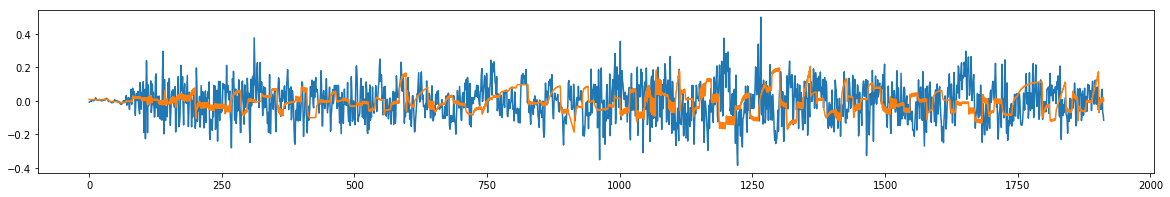

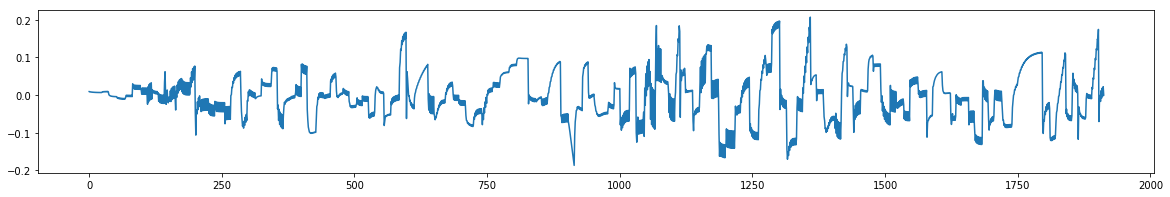

In [70]:
evoEvalFeedbackSynthesis(fbmodel['winner']["bestModel"], True, 1, fbmodel['winner']["bestResult"]['cue'])

In [159]:
vals = np.linspace(0.7,1.3,13)
alphaResults = np.zeros((len(ixiFiles), vals.shape[0]))
srResults = np.zeros((len(ixiFiles), vals.shape[0]))
for currentIxi in range(len(ixiFiles)):
    print("loading: ", ixiFiles[currentIxi], currentIxi)
    import dill as pickle
    with open("fbsynthResults/results2019-02-14 14:16:13.793452/" + ixistr(currentIxi) + "model.dill.pickled", "rb") as input_file:    
        fbmodel = pickle.load(input_file)    
    orgstd = std(fbmodel['winner']['bestResult']['waveform'])
    for i,v in enumerate(vals):
        fbresult = evoEvalFeedbackSynthesis(fbmodel['winner']["bestModel"], False,v, fbmodel['winner']["bestResult"]['cue'], 1)
        alphaResults[currentIxi][i] = std(fbresult['waveform']) / orgstd
    for i,v in enumerate(vals):
        fbresult = evoEvalFeedbackSynthesis(fbmodel['winner']["bestModel"], False,1, fbmodel['winner']["bestResult"]['cue'], v)
        srResults[currentIxi][i] = std(fbresult['waveform']) / orgstd        

loading:  zhish.wav 0
loading:  kernelmix.wav 1
loading:  rocks.wav 2
loading:  boomwag.wav 3
loading:  snork.wav 4
loading:  insec3.wav 5
loading:  MacrosemiaTonk.wav 6
loading:  pattern10.wav 7
loading:  MeimunaNau.wav 8
loading:  backswing-old1.wav 9
loading:  audoubelclick2.wav 10
loading:  laboa.wav 11
loading:  swipe-old1.wav 12
loading:  Macrosemia.wav 13
loading:  revbell.wav 14
loading:  laekur.wav 15
loading:  birta.wav 16
loading:  clicks1.wav 17
loading:  clicko-old1.wav 18
loading:  bellx.wav 19
loading:  camina2.wav 20
loading:  dentist-old1.wav 21
loading:  heart.wav 22
loading:  electro.wav 23
loading:  bello.wav 24
loading:  camina1.wav 25
loading:  noinoi.wav 26
loading:  click.wav 27
loading:  InsectInfestationZG.wav 28
loading:  harshi-old1.wav 29
loading:  bellrip3.wav 30
loading:  iron.wav 31
loading:  patterndrone.wav 32
loading:  ausiclick.wav 33
loading:  knock.wav 34
loading:  rotatingIron.wav 35
loading:  firespark.wav 36
loading:  insec2.wav 37
loading:  cam

In [236]:
# with open("lrsrresults_conceptors.dill.pickled", "rb") as input_file:    
#         clrsrResults = pickle.load(input_file)  

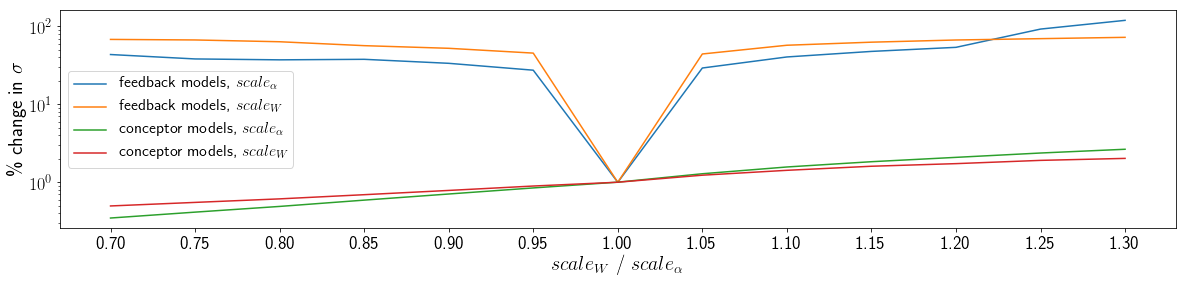

In [239]:
# ax=plt.figure(1,1,1)

figsize(20,4)
plt.rc('text', usetex=True)
plt.yscale("log")
plot(mean(alphaResults, axis=0), label="feedback models, $scale_{\\alpha}$")
plot(mean(srResults, axis=0), label="feedback models, $scale_W$")
plot(mean(clrsrResults['lr'], axis=0), label="conceptor models, $scale_{\\alpha}$")
plot(mean(clrsrResults['sr'], axis=0), label="conceptor models, $scale_W$")
plt.legend(fontsize=16)
plt.xlabel("$scale_W$ / $scale_{\\alpha}$", fontsize=20)
plt.ylabel("\\% change in $\\sigma$", fontsize=20)
plt.xticks(arange(13), valsStr, fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0) 
plt.rc('font', family='sans-serif')
plt.savefig('tmp/alpha-sr-changes.pdf', bbox_inches='tight')

In [95]:
std(fbresult['waveform'])

1.9053742038012336

In [228]:
def evoEvalFeedbackSynthesisStretch(model, plotResult=False, lrMod=1, cue=None, srMod=1, speed=1):
#     print("Resynthesis, lr: ", model['lr'] * lrMod)
    runLen = model['trainingSeq'].shape[0]
#     print("Runlen: ",runLen)
    u = 0
    x=None
    if (cue is None):
        x = 0.5 * np.random.randn(model['N'],1)
    else:
        x = cue
    cue = x.copy()
    LR = model['lr'] * lrMod
    Wmod = model['W'] * srMod
    #run to washout
    for n in range(50):
        xOld = x
        Wtarget = (Wmod.dot(x)) + (model['Win'].dot(u))
        newX =LR * tanh(Wtarget + model['Wbias'])
        oldX = (1 - LR) * xOld
        x = newX + oldX 
        u = model['Wouts'][0].dot(np.concatenate((x[:,0], np.array([1]))))

    outCollector = np.zeros((1, int(ceil(runLen/speed)))) 
    cueSequence = model['cueSequence'].copy()
    cueIdx=0
    nextCue = cueSequence[0]
    n = 0
    idx=0
    while n < runLen:
        if (n == nextCue[0]):
            cueIdx = nextCue[1]
    #         x = cues[:,cueIdx]
    #         u = sequences[cueIdx][0]
            if (cueSequence.shape[0] > 1):
                cueSequence = cueSequence[1:]
                nextCue = cueSequence[0]
#                 print(cueIdx, end="'")

        xOld = x
        Wtarget = (Wmod.dot(x)) + (model['Win'].dot(u))
        newX =LR * tanh(Wtarget + model['Wbias'])
        oldX = (1 - LR) * xOld
        x = newX + oldX 
        u = model['Wouts'][cueIdx].dot(np.concatenate((x[:,0], np.array([1]))))
        outCollector[0, idx] = u
#         print (model['trainingSeq'].shape, outCollector.shape)
        n = n + speed
        idx = idx + 1
#     error = compareMFCCs(outCollector[0], model['trainingSeq'])
#     print("Error: ", error)

    if (plotResult):
        print("Plotting results")
        figsize(20,3)
        figure(1)
        plot(model['trainingSeq'])
        plot(outCollector[0])
        figure(2)
        plot(outCollector[0])
    return {"waveform":outCollector[0], "cue":cue}

In [203]:
%%time
currentIxi = 91              
print("loading: ", ixiFiles[currentIxi], currentIxi)
import dill as pickle
with open("fbsynthResults/results/" + ixistr(currentIxi) + "model.dill.pickled", "rb") as input_file:    
    fbmodel = pickle.load(input_file)
#     with open("csynthResults/results2019-02-24 12:38:21.504030/" + ixistr(currentIxi) + "model2.dill.pickled", "rb") as input_file:    
#         cmodel = pickle.load(input_file)
#     fileLengths[currentIxi] = cmodel['original'].shape[0]
print(fbmodel['winner']['bestResult']['error'])
sr=22050

loading:  vindvahat.wav 91
0.055404186195982134
CPU times: user 884 µs, sys: 879 µs, total: 1.76 ms
Wall time: 1.14 ms


Plotting results


{'cue': array([[ 1.07267753],
        [ 0.22098897],
        [ 0.40371237],
        [-0.23589378],
        [-0.38390446],
        [-0.18794452],
        [-0.46204429],
        [ 0.50648128],
        [-0.43102947],
        [-0.29938205],
        [-0.31861776],
        [-0.02312615],
        [ 0.16329045],
        [ 1.12261638],
        [-0.4164007 ],
        [ 0.07093408],
        [-1.1395116 ],
        [-0.67009734],
        [-0.48909387],
        [-0.17314151],
        [ 0.60855644],
        [ 0.46897083],
        [ 0.60341642],
        [ 0.67431942],
        [ 0.19707834],
        [ 0.11130111],
        [ 0.13134472]]),
 'waveform': array([-0.05356071, -0.05066084, -0.0478628 , ...,  0.06608839,
         0.06480844,  0.06353454])}

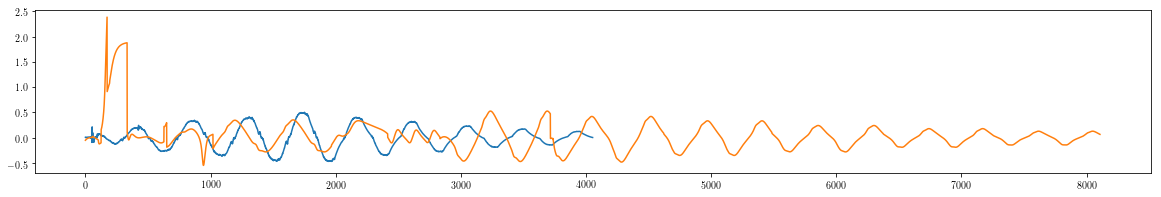

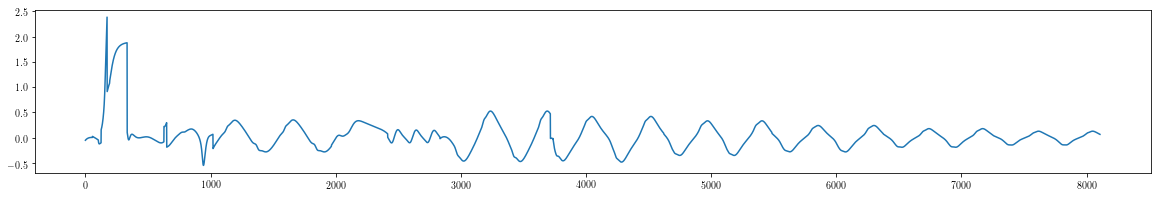

In [235]:
evoEvalFeedbackSynthesisStretch(fbmodel['winner']["bestModel"], True, 1, fbmodel['winner']["bestResult"]['cue'], 1,0.5)